In [2]:
import numpy as np
# Importing standard Qiskit libraries
from qiskit import *
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
import math
from fractions import Fraction


# Loading your IBM Q account(s)
provider = IBMQ.load_account()

ibmqfactory.load_account:WARNING:2021-04-26 10:13:08,591: Credentials are already in use. The existing account in the session will be replaced.


In [3]:
#from qiskit textbook ,
#to create U^x we will repeat the circuit x times
#returns the controlled-U gate for a, repeated power times.
def c_amod15(a, power):
    """Controlled multiplication by a mod 15"""
    if a not in [2,7,8,11,13]:
        raise ValueError("'a' must be 2,7,8,11 or 13")
    U = QuantumCircuit(4)        
    for iteration in range(power):
        if a in [2,13]:
            U.swap(0,1)
            U.swap(1,2)
            U.swap(2,3)
        if a in [7,8]:
            U.swap(2,3)
            U.swap(1,2)
            U.swap(0,1)
        if a == 11:
            U.swap(1,3)
            U.swap(0,2)
        if a in [7,11,13]:
            for q in range(4):
                U.x(q)
    U = U.to_gate()
    U.name = "%i^%i mod 15" % (a, power)
    c_U = U.control()
    return c_U

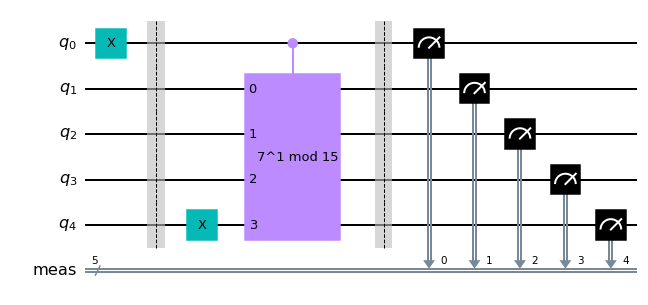

In [7]:
#testing out for 7^1
qc = QuantumCircuit(5) # one control qubit


a = 7
pwr = 1
qc.x(0)
qc.barrier();
qc.x(4)
qc.append(c_amod15(a,pwr),[0,1,2,3,4])
qc.measure_all()
display(qc.draw())

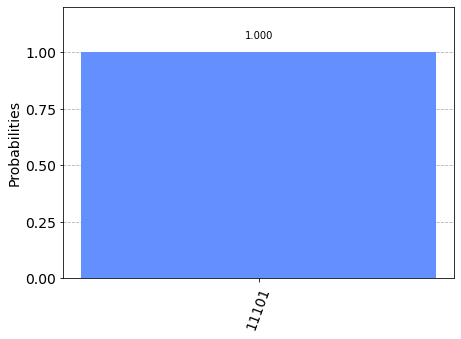

In [10]:
qasm_sim = Aer.get_backend('qasm_simulator')
t_qc = transpile(qc,qasm_sim)
results = qasm_sim.run(assemble(t_qc)).result()
ans = results.get_counts()

plot_histogram(ans)

In [11]:
def qft_inv(n):
    qc = QuantumCircuit(n)
    
    for qubit in range(n//2):
        qc.swap(qubit, n-qubit-1)
    for j in range(n):
        for m in range(j):
            qc.cp(-np.pi/float(2**(j-m)), m, j)
        qc.h(j)
    #qc.name = "QFT†"
    return qc

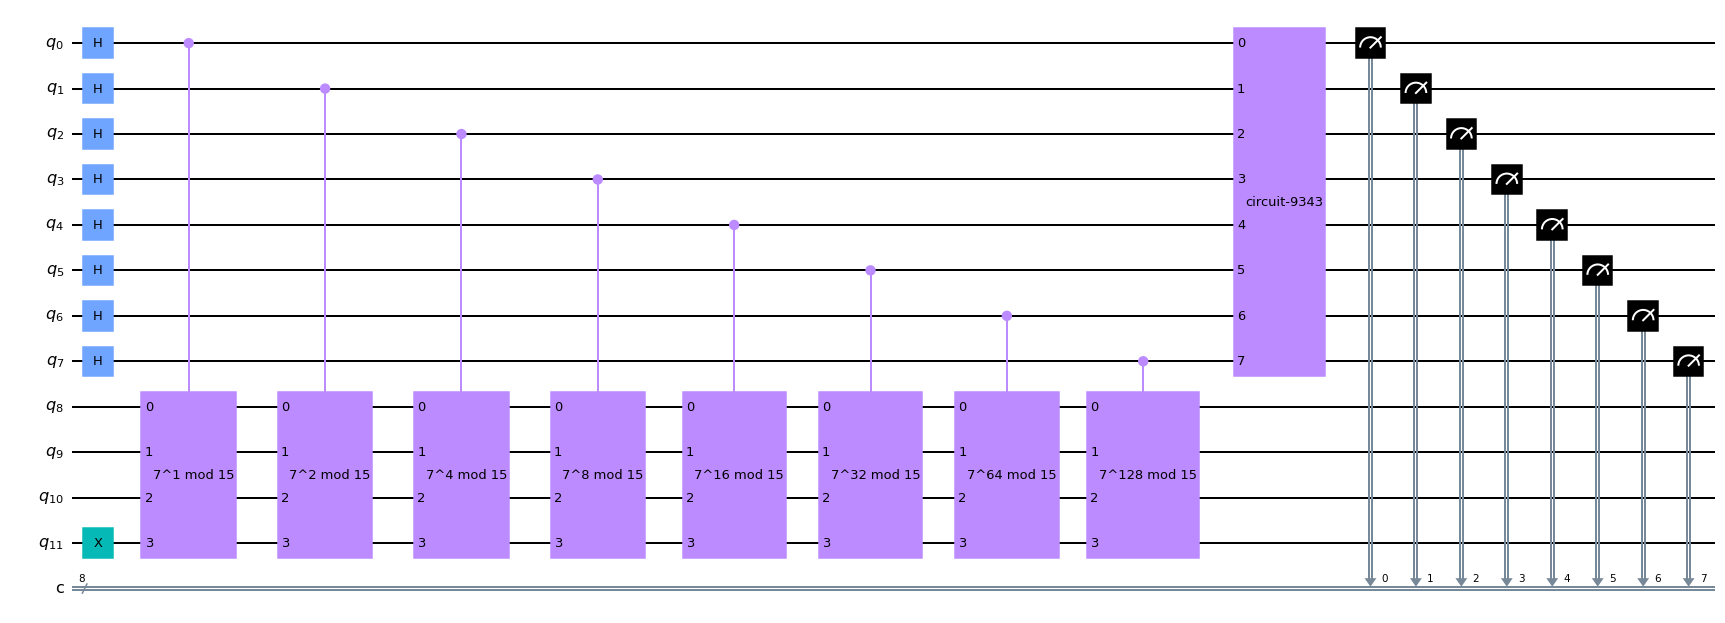

In [16]:
t = 8  #no of counting bits
a = 7
qc = QuantumCircuit(t+4,t) #4 qubits for the second register and t bits for measurement
for i in range(t):
    qc.h(i)
qc.x(3+t)
    
for j in range(t):
    qc.append(c_amod15(a,2**j),[j]+[q+t for q in range(4)])
qc.append(qft_inv(t),range(t))
qc.measure(range(t),range(t))
qc.draw(fold = -1)

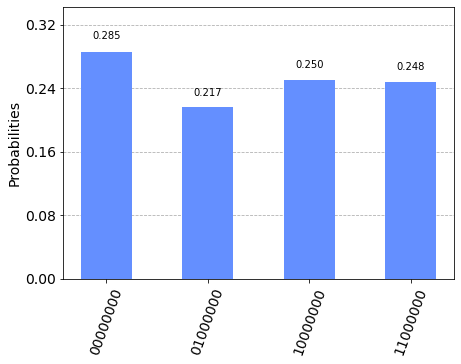

In [17]:
qasm_sim = Aer.get_backend('qasm_simulator')
t_qc = transpile(qc,qasm_sim)
results = qasm_sim.run(assemble(t_qc)).result()
ans = results.get_counts()

plot_histogram(ans)

In [21]:
phase_list = fraction_list = r_list = []

for i in ans:
    phase = int(i,2)/(2**t)
    phase_list.append(phase)
    fraction_list.append(Fraction(phase).limit_denominator(15))
    r_list.append(Fraction(phase).denominator);

In [22]:
for i in range(len(phase_list)):
    print(phase_list[i],fraction_list[i],r_list[i])

0.25 0.25 0.25
1/4 1/4 1/4
4 4 4
0.0 0.0 0.0
0 0 0
1 1 1
0.5 0.5 0.5
1/2 1/2 1/2
2 2 2
0.75 0.75 0.75
3/4 3/4 3/4
4 4 4
